In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

In [4]:
df.isnull().mean()

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
## conversion of object into integer

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df1= df

In [10]:
le_mainroad= LabelEncoder()

In [30]:
df1['mainroad']=le_mainroad.fit_transform(df1['mainroad'])

In [31]:
le_guestroom= LabelEncoder()

In [32]:
df1['guestroom']=le_guestroom.fit_transform(df1['guestroom'])

In [15]:
le_basement= LabelEncoder()

In [33]:
df1['basement']=le_basement.fit_transform(df1['basement'])

In [17]:
le_hotwaterheating= LabelEncoder()

In [34]:
df1['hotwaterheating']=le_basement.fit_transform(df1['hotwaterheating'])

In [19]:
le_airconditioning= LabelEncoder()

In [35]:
df1['airconditioning']=le_airconditioning.fit_transform(df1['airconditioning'])

In [21]:
le_prefarea= LabelEncoder()

In [36]:
df1['prefarea']=le_prefarea.fit_transform(df1['prefarea'])

In [23]:
le_furnishingstatus= LabelEncoder()

In [37]:
df1['furnishingstatus']=le_furnishingstatus.fit_transform(df1['furnishingstatus'])

In [41]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [54]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Training and Testing Data

In [40]:
y = df1['price']

In [43]:
X = df1[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.66028776e+02  1.06819922e+05  9.50400838e+05  4.62675653e+05
  4.08149492e+05  1.07728026e+05  4.06933825e+05  1.04531059e+06
  8.20713183e+05  2.93021088e+05  7.03534010e+05 -2.31445926e+05]


# Predicting Test Data

In [50]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

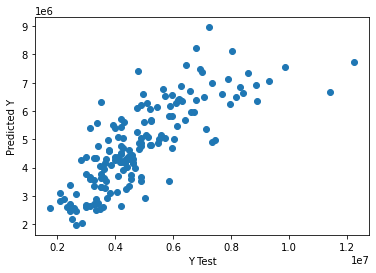

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [53]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
area,2.660288e+02
bedrooms,1.068199e+05
bathrooms,9.504008e+05
stories,4.626757e+05
mainroad,4.081495e+05
guestroom,1.077280e+05
basement,4.069338e+05
hotwaterheating,1.045311e+06
airconditioning,8.207132e+05
parking,2.930211e+05


# saving of model

In [60]:
import pickle

In [61]:
saved_model = pickle.dumps(lm)

In [62]:
lm_from_pickle = pickle.loads(saved_model)

In [65]:
lm_from_pickle.predict(X_test)

array([5272734.34234205, 6349290.67128187, 4992061.71405543,
       4978778.0044869 , 4570558.32520992, 3541035.33348346,
       7121707.14587683, 3320813.09516897, 5086883.03720924,
       5694957.09942657, 4766214.2655658 , 7547278.30600154,
       4324794.65925515, 4358614.88661917, 6372478.35188332,
       5655604.4139519 , 5409529.31313853, 6721866.13599564,
       2596631.39625274, 3362989.15627588, 5000878.20705942,
       4680241.6808963 , 5964412.19063058, 5837084.18608929,
       3606507.80109604, 4031110.81848207, 2677319.14902837,
       4211012.20963932, 3273983.99275233, 4907689.15390004,
       6565285.07414259, 3102688.476374  , 6833383.54708989,
       2635514.03901285, 6146654.55787707, 2891923.33783319,
       4664908.3274373 , 7429921.64985312, 3643825.34094033,
       2585990.2452048 , 4447333.74990406, 6662844.72847001,
       5136894.09639971, 5717095.63176715, 3078533.80598276,
       2759317.36136947, 5562017.8933055 , 3980954.78495205,
       6890895.83261735,